# Effective radiative forcing assessment

In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
%load_ext autoreload
%autoreload 2

<IPython.core.display.Javascript object>

In [3]:
import os.path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pyrcmip.assessed_ranges
import pyrcmip.database
import scmdata
import seaborn as sns
import tqdm.autonotebook as tqdman
from matplotlib.gridspec import GridSpec
from mock import MagicMock

/data/ubuntu-znicholls/miniconda3/envs/rcmip-phase-2/lib/python3.7/site-packages/pyrcmip/assessed_ranges.py:12: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  import tqdm.autonotebook as tqdman


<IPython.core.display.Javascript object>

In [4]:
import utils.plotting
import utils.rcmip

<IPython.core.display.Javascript object>

In [5]:
# setup matplotlib to save appropriately
utils.plotting.setup()

<IPython.core.display.Javascript object>

In [6]:
PAPER_DIR = os.path.join("..", "..", "paper")

<IPython.core.display.Javascript object>

In [7]:
ASSESSED_RANGES_CSV = os.path.join(
    "..", "..", "data", "processed", "assessed-ranges", "assessed-ranges.csv"
)
ASSESSED_RANGES_CSV

'../../data/processed/assessed-ranges/assessed-ranges.csv'

<IPython.core.display.Javascript object>

In [8]:
assessed_ranges = pd.read_csv(ASSESSED_RANGES_CSV)
assessed_ranges.head()

RCMIP name  \
0  Surface Air Ocean Blended Temperature Change W...   
1                    Equilibrium Climate Sensitivity   
2                         Transient Climate Response   
3            Transient Climate Response to Emissions   
4  Effective Radiative Forcing|Anthropogenic|CH4 ...   

                                      RCMIP variable RCMIP region  \
0       Surface Air Ocean Blended Temperature Change        World   
1                                                NaN          NaN   
2                     Surface Air Temperature Change        World   
3  Surface Air Temperature Change,Cumulative Emis...        World   
4      Effective Radiative Forcing|Anthropogenic|CH4        World   

  RCMIP scenario  evaluation_period_start  evaluation_period_end  \
0         ssp245                   2000.0                 2019.0   
1            NaN                      NaN                    NaN   
2        1pctCO2                      NaN                    NaN   
3        1pctCO2                      NaN                    NaN   
4     historical                   2011.0                 2011.0   

   norm_period_start  norm_period_end  very_likely__lower  likely__lower  \
0             1961.0           1990.0            0.462509            NaN   
1                NaN              NaN            2.300000         2.6000   
2                NaN              NaN            0.980000         1.2600   
3                NaN              NaN            1.030000         1.4000   
4             1750.0           1750.0                 NaN         0.4725   

   central  likely__upper  very_likely__upper     unit  \
0   0.5372            NaN            0.613695        K   
1   3.1000         3.9000            4.700000        K   
2   1.6400         2.0200            2.290000        K   
3   1.7700         2.1400            2.510000  K / TtC   
4   0.6000         0.7275                 NaN  W / m^2   

  RCMIP evaluation method                                             Source  
0                    mean                                    HadCRUT.4.6.0.0  
1          model-reported                              Sherwood et al., 2020  
2                  custom    Tokarska et al., 2020 Table S3 Both constrained  
3                  custom                                 Arora et al., 2020  
4                    mean  AR5 WG1 Table 8.SM.6, with extra 25% based on ...

<IPython.core.display.Javascript object>

In [9]:
assessed_ranges.loc[:, "norm_period_start"] = np.nan
assessed_ranges.loc[:, "norm_period_end"] = np.nan

<IPython.core.display.Javascript object>

In [10]:
assessed_ranges = utils.rcmip.get_monkey_patched_assessed_ranges(
    pyrcmip.assessed_ranges.AssessedRanges(assessed_ranges)
)

<IPython.core.display.Javascript object>

In [11]:
assessed_ranges.head()

RCMIP name  \
0  Surface Air Ocean Blended Temperature Change W...   
1                    Equilibrium Climate Sensitivity   
2                         Transient Climate Response   
3            Transient Climate Response to Emissions   
4  Effective Radiative Forcing|Anthropogenic|CH4 ...   

                                      RCMIP variable RCMIP region  \
0       Surface Air Ocean Blended Temperature Change        World   
1                                                NaN          NaN   
2                     Surface Air Temperature Change        World   
3  Surface Air Temperature Change,Cumulative Emis...        World   
4      Effective Radiative Forcing|Anthropogenic|CH4        World   

  RCMIP scenario  evaluation_period_start  evaluation_period_end  \
0         ssp245                   2000.0                 2019.0   
1            NaN                      NaN                    NaN   
2        1pctCO2                      NaN                    NaN   
3        1pctCO2                      NaN                    NaN   
4     historical                   2011.0                 2011.0   

   norm_period_start  norm_period_end  very_likely__lower  likely__lower  \
0                NaN              NaN            0.462509            NaN   
1                NaN              NaN            2.300000         2.6000   
2                NaN              NaN            0.980000         1.2600   
3                NaN              NaN            1.030000         1.4000   
4                NaN              NaN                 NaN         0.4725   

   central  likely__upper  very_likely__upper     unit  \
0   0.5372            NaN            0.613695        K   
1   3.1000         3.9000            4.700000        K   
2   1.6400         2.0200            2.290000        K   
3   1.7700         2.1400            2.510000  K / TtC   
4   0.6000         0.7275                 NaN  W / m^2   

  RCMIP evaluation method                                             Source  
0                    mean                                    HadCRUT.4.6.0.0  
1          model-reported                              Sherwood et al., 2020  
2                  custom    Tokarska et al., 2020 Table S3 Both constrained  
3                  custom                                 Arora et al., 2020  
4                    mean  AR5 WG1 Table 8.SM.6, with extra 25% based on ...

<IPython.core.display.Javascript object>

In [12]:
assessed_ranges.db["RCMIP name"].tolist()

['Surface Air Ocean Blended Temperature Change World ssp245 2000-2019',
 'Equilibrium Climate Sensitivity',
 'Transient Climate Response',
 'Transient Climate Response to Emissions',
 'Effective Radiative Forcing|Anthropogenic|CH4 World historical-1750',
 'Effective Radiative Forcing|Anthropogenic|N2O World historical-1750',
 'Effective Radiative Forcing|Anthropogenic|Montreal Gases World historical-1750',
 'Effective Radiative Forcing|Anthropogenic|F-Gases World historical-1750',
 'Effective Radiative Forcing|Anthropogenic|CO2 World historical-1750',
 'Effective Radiative Forcing|Anthropogenic|Aerosols World historical-1750',
 'Radiative Forcing|Anthropogenic|Tropospheric Ozone World historical-1750',
 'Radiative Forcing|Anthropogenic|Stratospheric Ozone World historical-1750',
 'Radiative Forcing|Anthropogenic|Other|CH4 Oxidation Stratospheric H2O World historical-1750',
 'Radiative Forcing|Anthropogenic|Albedo Change World historical-1750',
 'Radiative Forcing|Anthropogenic|Other|BC

<IPython.core.display.Javascript object>

In [13]:
OUTPUT_DATABASE_DIR = os.path.join(
    "..", "..", "data", "processed", "submission-database"
)
db = pyrcmip.database.Database(OUTPUT_DATABASE_DIR)
db

<utils.scmdata.Database (root_dir: ../../data/processed/submission-database)>

<IPython.core.display.Javascript object>

In [14]:
erf_timeseries = (
    scmdata.run_append(
        [
            db.load_data("*", v, "World", s)
            for v in [
                "Effective Radiative Forcing",
                "Effective Radiative Forcing*CH4",
                "Effective Radiative Forcing*CO2",
                "Effective Radiative Forcing*Aerosols",
                "Effective Radiative Forcing|Anthropogenic|Tropospheric Ozone",
            ]
            for s in ["ssp*", "historical"]
        ]
    )
    .filter(scenario=["*lowNTCF*", "ssp245-*"], keep=False)
    .convert_unit("W / m^2")
)
erf_timeseries

Loading files:   0%|          | 0/75 [00:00<?, ?it/s]

/data/ubuntu-znicholls/miniconda3/envs/rcmip-phase-2/lib/python3.7/site-packages/scmdata/netcdf.py:201: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dims["time"] = _read_time_variable(ds.variables["time"])


Loading files:   0%|          | 0/8 [00:00<?, ?it/s]

Loading files:   0%|          | 0/75 [00:00<?, ?it/s]

Loading files:   0%|          | 0/8 [00:00<?, ?it/s]

Loading files:   0%|          | 0/75 [00:00<?, ?it/s]

Loading files:   0%|          | 0/8 [00:00<?, ?it/s]

Loading files:   0%|          | 0/82 [00:00<?, ?it/s]

Loading files:   0%|          | 0/9 [00:00<?, ?it/s]

Loading files:   0%|          | 0/41 [00:00<?, ?it/s]

Loading files:   0%|          | 0/4 [00:00<?, ?it/s]

<scmdata.ScmRun (timeseries: 510821, timepoints: 751)>
Time:
	Start: 1750-01-01T00:00:00
	End: 2500-01-01T00:00:00
Meta:
	       climate_model  ensemble_member           model region    scenario  \
	0           MCE-v1-2              0.0  not_applicable  World      ssp370   
	1           MCE-v1-2              1.0  not_applicable  World      ssp370   
	2           MCE-v1-2              2.0  not_applicable  World      ssp370   
	3           MCE-v1-2              3.0  not_applicable  World      ssp370   
	4           MCE-v1-2              4.0  not_applicable  World      ssp370   
	...              ...              ...             ...    ...         ...   
	510816       FaIR1.6            496.0     unspecified  World  historical   
	510817       FaIR1.6            497.0     unspecified  World  historical   
	510818       FaIR1.6            498.0     unspecified  World  historical   
	510819       FaIR1.6            499.0     unspecified  World  historical   
	510820       FaIR1.6           

<IPython.core.display.Javascript object>

In [15]:
erf_timeseries.get_unique_meta("scenario")

['ssp370',
 'ssp585',
 'ssp534-over',
 'ssp434',
 'ssp126',
 'ssp119',
 'ssp460',
 'ssp245',
 'historical']

<IPython.core.display.Javascript object>

In [16]:
erf_timeseries.get_unique_meta("climate_model")

['MCE-v1-2',
 'FaIRv2.0.0-alpha',
 'OSCARv3.1',
 'EMGC',
 'Cicero-SCM',
 'SCM4OPTv2.1',
 'MAGICCv7.5.1',
 'FaIR1.6',
 'Hector']

<IPython.core.display.Javascript object>

In [17]:
erf_timeseries.head()

time                                                                                              1750-01-01 00:00:00  \
climate_model ensemble_member model          region scenario unit    variable                                           
MCE-v1-2      0.0             not_applicable World  ssp370   W / m^2 Effective Radiative Forcing                  NaN   
              1.0             not_applicable World  ssp370   W / m^2 Effective Radiative Forcing                  NaN   
              2.0             not_applicable World  ssp370   W / m^2 Effective Radiative Forcing                  NaN   
              3.0             not_applicable World  ssp370   W / m^2 Effective Radiative Forcing                  NaN   
              4.0             not_applicable World  ssp370   W / m^2 Effective Radiative Forcing                  NaN   

time                                                                                              1751-01-01 00:00:00  \
climate_model ensemble_member model          region scenario unit    variable                                           
MCE-v1-2      0.0             not_applicable World  ssp370   W / m^2 Effective Radiative Forcing                  NaN   
              1.0             not_applicable World  ssp370   W / m^2 Effective Radiative Forcing                  NaN   
              2.0             not_applicable World  ssp370   W / m^2 Effective Radiative Forcing                  NaN   
              3.0             not_applicable World  ssp370   W / m^2 Effective Radiative Forcing                  NaN   
              4.0             not_applicable World  ssp370   W / m^2 Effective Radiative Forcing                  NaN   

time                                                                                              1752-01-01 00:00:00  \
climate_model ensemble_member model          region scenario unit    variable                                           
MCE-v1-2      0.0             not_applicable World  ssp370   W / m^2 Effective Radiative Forcing                  NaN   
              1.0             not_applicable World  ssp370   W / m^2 Effective Radiative Forcing                  NaN   
              2.0             not_applicable World  ssp370   W / m^2 Effective Radiative Forcing                  NaN   
              3.0             not_applicable World  ssp370   W / m^2 Effective Radiative Forcing                  NaN   
              4.0             not_applicable World  ssp370   W / m^2 Effective Radiative Forcing                  NaN   

time                                                                                              1753-01-01 00:00:00  \
climate_model ensemble_member model          region scenario unit    variable                                           
MCE-v1-2      0.0             not_applicable World  ssp370   W / m^2 Effective Radiative Forcing                  NaN   
              1.0             not_applicable World  ssp370   W / m^2 Effective Radiative Forcing                  NaN   
              2.0             not_applicable World  ssp370   W / m^2 Effective Radiative Forcing                  NaN   
              3.0             not_applicable World  ssp370   W / m^2 Effective Radiative Forcing                  NaN   
              4.0             not_applicable World  ssp370   W / m^2 Effective Radiative Forcing                  NaN   

time                                                                                              1754-01-01 00:00:00  \
climate_model ensemble_member model          region scenario unit    variable                                           
MCE-v1-2      0.0             not_applicable World  ssp370   W / m^2 Effective Radiative Forcing                  NaN   
              1.0             not_applicable World  ssp370   W / m^2 Effective Radiative Forcing                  NaN   
              2.0             not_applicable World  ssp370   W / m^2 Effective Radiative Forcing                  NaN   
   

<IPython.core.display.Javascript object>

In [18]:
def remove_pipes_in_axis_labels(ax):
    replace_args = [
        "Effective Radiative Forcing|Anthropogenic|",
        "Effective Radiative Forcing ",
    ]
    ax.set_ylabel(ax.get_ylabel().replace(*replace_args))
    ax.set_xlabel(ax.get_xlabel().replace(*replace_args))

    return ax

<IPython.core.display.Javascript object>

Using OSCAR reported data for Effective Radiative Forcing|Anthropogenic|Aerosols World historical-1750


Renormalising histograms:   0%|          | 0/10 [00:00<?, ?it/s]

/data/ubuntu-znicholls/miniconda3/envs/rcmip-phase-2/lib/python3.7/site-packages/ipykernel_launcher.py:66: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
findfont: Font family ['DejaVu Sans'] not found. Falling back to Helvetica.


../../paper/historical_effective-radiative-forcing-anthropogenic-aerosols_v_assessment.pdf


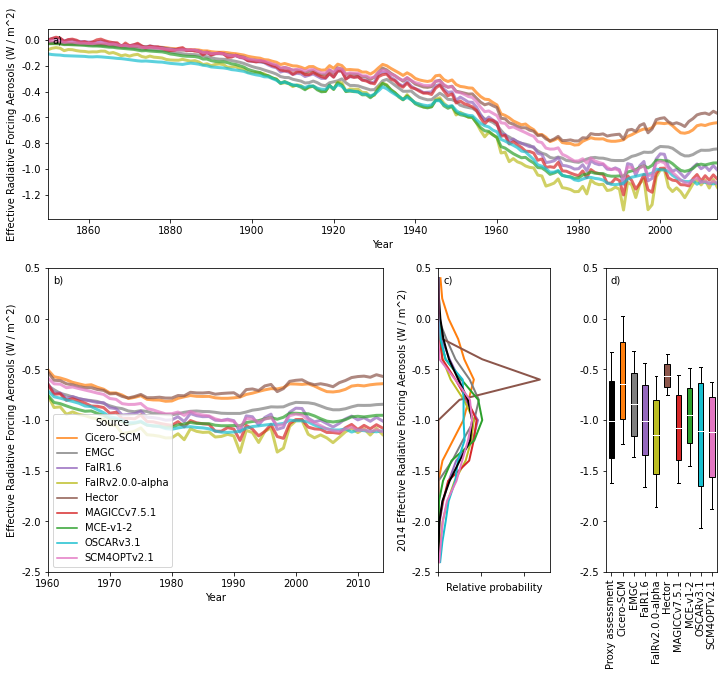

Using OSCAR reported data for Effective Radiative Forcing|Anthropogenic|CO2 World historical-1750


Renormalising histograms:   0%|          | 0/9 [00:00<?, ?it/s]

/data/ubuntu-znicholls/miniconda3/envs/rcmip-phase-2/lib/python3.7/site-packages/ipykernel_launcher.py:66: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


../../paper/historical_effective-radiative-forcing-anthropogenic-co2_v_assessment.pdf


Using OSCAR reported data for Effective Radiative Forcing|Anthropogenic|CH4 World historical-1750


Renormalising histograms:   0%|          | 0/9 [00:00<?, ?it/s]

/data/ubuntu-znicholls/miniconda3/envs/rcmip-phase-2/lib/python3.7/site-packages/ipykernel_launcher.py:66: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


../../paper/historical_effective-radiative-forcing-anthropogenic-ch4_v_assessment.pdf


<IPython.core.display.Javascript object>

In [19]:
for variable, ylim_pdf, bins, custom_heights in (
    (
        "Effective Radiative Forcing|Anthropogenic|Aerosols",
        [-2.5, 0.5],
        np.arange(-2.5, 0.51, 0.2),
        {"hector": 1 / 2},
    ),
    (
        "Effective Radiative Forcing|Anthropogenic|CO2",
        [0.5, 2.5],
        np.arange(0.5, 2.51, 0.1),
        {"Cicero-SCM": 1 / 3, "EMGC": 1 / 3, "OSCARv3.1": 1 / 3},
    ),
    (
        "Effective Radiative Forcing|Anthropogenic|CH4",
        [0.2, 1],
        np.arange(0.2, 1.01, 0.05),
        {"Cicero-SCM": 1 / 3, "EMGC": 1 / 3, "OSCARv3.1": 1 / 3},
    ),
):
    fig = plt.figure(figsize=(12, 10))
    gs = GridSpec(
        2, 3, width_ratios=[3, 1, 1], height_ratios=[1, 1.6], wspace=0.3, hspace=0.2
    )
    ax_ts = fig.add_subplot(gs[1, 0])
    ax_box = fig.add_subplot(gs[1, 2], sharey=ax_ts)
    ax_pdf = fig.add_subplot(gs[1, 1], sharey=ax_ts)
    ax_ts_long_same_ref_period = fig.add_subplot(gs[0, :])

    plt_years = range(1960, 2014 + 1)
    plt_years_long = range(1850, 2014 + 1)

    (
        ax_ts,
        ax_pdf,
        ax_box,
        (ax_ts_long_same_ref_period,),
    ) = utils.plotting.make_hist_assessed_range_comparison_figure(
        assessed_ranges=assessed_ranges,
        data_scmrun=erf_timeseries,
        obs=None,
        variable=variable,
        metric="{} World historical-1750".format(variable),
        include_assessed_pdf=True,
        quantiles=(0.5,),
        process_over_columns=("ensemble_member",),
        linewidth=3,
        palette=utils.plotting.CLIMATE_MODEL_PALETTE,
        hue="Source",
        scenario="historical",
        plt_years=plt_years,
        long_ts_ref_periods_axes_plt_years=(
            (ax_ts_long_same_ref_period, None, plt_years_long),
        ),
        ax_ts=ax_ts,
        ax_pdf=ax_pdf,
        ax_box=ax_box,
        ylim_pdf=ylim_pdf,
        bins=bins,
        custom_heights=custom_heights,
    )

    for ax in [ax_ts, ax_pdf, ax_ts_long_same_ref_period]:
        ax = remove_pipes_in_axis_labels(ax)

    plt.tight_layout()
    outfile = os.path.join(
        PAPER_DIR,
        "historical_{}_v_assessment.pdf".format(
            variable.lower().replace(" ", "-").replace("|", "-")
        ),
    )
    plt.savefig(outfile, **utils.plotting.SAVE_KWARGS)
    print(outfile)
    plt.show()
#     break

In [20]:
quantiles = (0.5,)
process_over_columns = ("ensemble_member",)
ref_period = None
linewidth = 3

palette = utils.plotting.CLIMATE_MODEL_PALETTE

hue = "Source"
units = "climate_model"
variable = "Effective Radiative Forcing"
unit = "W / m^2"
include_assessed_pdf = False

<IPython.core.display.Javascript object>

In [21]:
erf_timeseries.get_unique_meta("variable")

['Effective Radiative Forcing',
 'Effective Radiative Forcing|Anthropogenic|CH4',
 'Effective Radiative Forcing|Anthropogenic|CO2',
 'Effective Radiative Forcing|Anthropogenic|Aerosols',
 'Effective Radiative Forcing|Anthropogenic|Tropospheric Ozone']

<IPython.core.display.Javascript object>

Scenarios:   0%|          | 0/3 [00:00<?, ?it/s]

ssp119
ssp119 2081-2100 Effective Radiative Forcing (W / m^2)
Using OSCAR reported data for ssp119 2081-2100 Effective Radiative Forcing (W / m^2)


Renormalising histograms:   0%|          | 0/8 [00:00<?, ?it/s]

ssp119
ssp119 Peak Effective Radiative Forcing (W / m^2)
Not using OSCAR reported data for ssp119 Peak Effective Radiative Forcing (W / m^2)


Renormalising histograms:   0%|          | 0/8 [00:00<?, ?it/s]

ssp119
ssp119 Year of peak Effective Radiative Forcing (W / m^2)
Not using OSCAR reported data for ssp119 Year of peak Effective Radiative Forcing (W / m^2)


Renormalising histograms:   0%|          | 0/8 [00:00<?, ?it/s]

/data/ubuntu-znicholls/miniconda3/envs/rcmip-phase-2/lib/python3.7/site-packages/ipykernel_launcher.py:99: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


../../paper/ssp119-erf-2100.pdf


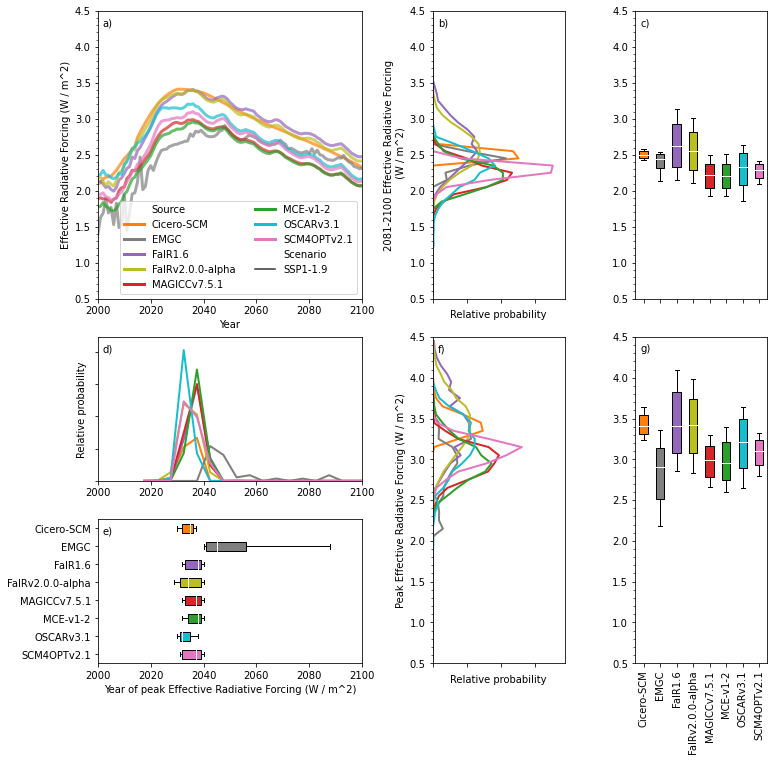

ssp126
ssp126 2081-2100 Effective Radiative Forcing (W / m^2)
Using OSCAR reported data for ssp126 2081-2100 Effective Radiative Forcing (W / m^2)


Renormalising histograms:   0%|          | 0/8 [00:00<?, ?it/s]

ssp126
ssp126 Peak Effective Radiative Forcing (W / m^2)
Not using OSCAR reported data for ssp126 Peak Effective Radiative Forcing (W / m^2)


Renormalising histograms:   0%|          | 0/8 [00:00<?, ?it/s]

ssp126
ssp126 Year of peak Effective Radiative Forcing (W / m^2)
Not using OSCAR reported data for ssp126 Year of peak Effective Radiative Forcing (W / m^2)


Renormalising histograms:   0%|          | 0/8 [00:00<?, ?it/s]

/data/ubuntu-znicholls/miniconda3/envs/rcmip-phase-2/lib/python3.7/site-packages/ipykernel_launcher.py:99: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


../../paper/ssp126-erf-2100.pdf


ssp585
ssp585 2081-2100 Effective Radiative Forcing (W / m^2)
Using OSCAR reported data for ssp585 2081-2100 Effective Radiative Forcing (W / m^2)


Renormalising histograms:   0%|          | 0/8 [00:00<?, ?it/s]

/data/ubuntu-znicholls/miniconda3/envs/rcmip-phase-2/lib/python3.7/site-packages/ipykernel_launcher.py:99: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


../../paper/ssp585-erf-2100.pdf


<IPython.core.display.Javascript object>

In [22]:
scenarios_ylims_peaks = (
    (
        "ssp119",
        [0.5, 4.5],
        True,
        False,
        {"Cicero-SCM": 1 / 2, "EMGC": 1 / 2},
        0.1,
    ),
    (
        "ssp126",
        [1.3, 4.7],
        True,
        False,
        {"Cicero-SCM": 1 / 3, "EMGC": 1 / 2},
        0.1,
    ),
    #     (
    #         "ssp434",
    #         [1.5, 5.5],
    #         True,
    #         False,
    #         {"Cicero-SCM": 1 / 2},
    #         0.1,
    #     ),
    #     (
    #         "ssp534-over",
    #         [1.5, 6.5],
    #         True,
    #         False,
    #         {"Cicero-SCM": 1 / 2},
    #         0.1,
    #     ),
    #     (
    #         "ssp245",
    #         [1.5, 7],
    #         False,
    #         False,
    #         {"Cicero-SCM": 1 / 2},
    #         0.1,
    #     ),
    #     (
    #         "ssp460",
    #         [1.5, 8],
    #         False,
    #         False,
    #         {"Cicero-SCM": 1 / 2},
    #         0.1,
    #     ),
    #     (
    #         "ssp370",
    #         [1.5, 10],
    #         False,
    #         False,
    #         {"Cicero-SCM": 1 / 2},
    #         0.1,
    #     ),
    (
        "ssp585",
        [1.5, 12],
        False,
        False,
        {"Cicero-SCM": 1 / 2},
        0.1,
    ),
)

for (
    scenario,
    ylim_ts,
    include_peak,
    cmip6,
    custom_heights,
    bin_width,
) in tqdman.tqdm(scenarios_ylims_peaks[:], desc="Scenarios"):
    utils.plotting.make_overview_plot(
        erf_timeseries,
        None,
        quantiles,
        process_over_columns,
        scenario,
        ref_period,
        eval_period_end=range(2081, 2100 + 1),
        plt_years=range(2000, 2100 + 1),
        ylim_ts=ylim_ts,
        linewidth=linewidth,
        palette=palette,
        hue=hue,
        units=units,
        variable=variable,
        cmip_var=None,
        unit=unit,
        include_peak=include_peak,
        custom_heights=custom_heights,
        cmip6=False,
        include_assessed_pdf=False,
        bin_width=bin_width,
    )
    plt.tight_layout()
    outfile = os.path.join(
        PAPER_DIR,
        f"{scenario}-erf-2100.pdf",
    )
    plt.savefig(outfile, **utils.plotting.SAVE_KWARGS)
    print(outfile)
    plt.show()
#     break

Scenarios:   0%|          | 0/3 [00:00<?, ?it/s]

ssp119
ssp119 2250-2300 Effective Radiative Forcing (W / m^2)
Using OSCAR reported data for ssp119 2250-2300 Effective Radiative Forcing (W / m^2)


Renormalising histograms:   0%|          | 0/8 [00:00<?, ?it/s]

/data/ubuntu-znicholls/miniconda3/envs/rcmip-phase-2/lib/python3.7/site-packages/ipykernel_launcher.py:99: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


../../paper/ssp119-erf-2300.pdf


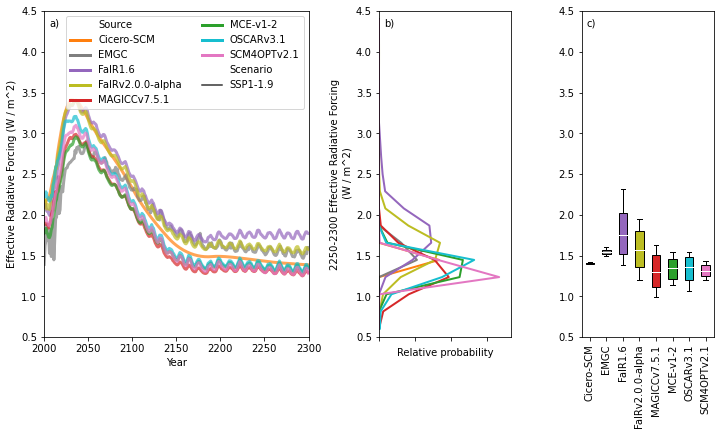

ssp126
ssp126 2250-2300 Effective Radiative Forcing (W / m^2)
Using OSCAR reported data for ssp126 2250-2300 Effective Radiative Forcing (W / m^2)


Renormalising histograms:   0%|          | 0/8 [00:00<?, ?it/s]

/data/ubuntu-znicholls/miniconda3/envs/rcmip-phase-2/lib/python3.7/site-packages/ipykernel_launcher.py:99: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


../../paper/ssp126-erf-2300.pdf


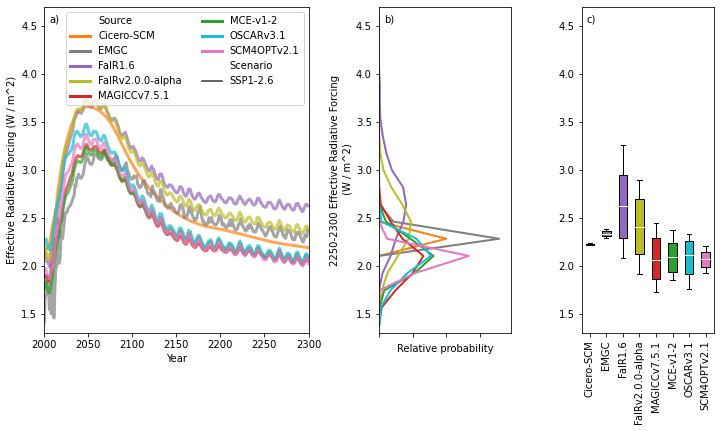

ssp585
ssp585 2250-2300 Effective Radiative Forcing (W / m^2)
Using OSCAR reported data for ssp585 2250-2300 Effective Radiative Forcing (W / m^2)


Renormalising histograms:   0%|          | 0/8 [00:00<?, ?it/s]

/data/ubuntu-znicholls/miniconda3/envs/rcmip-phase-2/lib/python3.7/site-packages/ipykernel_launcher.py:99: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


../../paper/ssp585-erf-2300.pdf


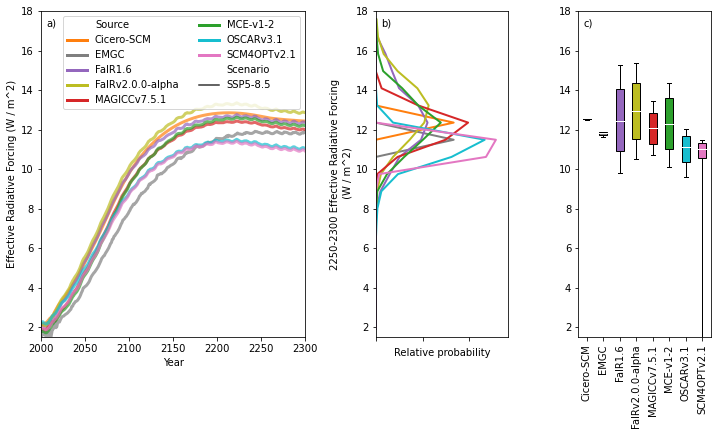

<IPython.core.display.Javascript object>

In [23]:
scenarios_ylims_peaks = (
    (
        "ssp119",
        [0.5, 4.5],
        False,
        False,
        {"Cicero-SCM": 1 / 3, "EMGC": 1 / 3},
        0.1,
    ),
    (
        "ssp126",
        [1.3, 4.7],
        False,
        False,
        {"Cicero-SCM": 1 / 2},
        0.1,
    ),
    #         (
    #             "ssp434",
    #             [1.5, 5.5],
    #             True,
    #             False,
    #             {"Cicero-SCM": 1 / 2},
    #             0.1,
    #         ),
    #         (
    #             "ssp534-over",
    #             [1.5, 6.5],
    #             True,
    #             False,
    #             {"Cicero-SCM": 1 / 2},
    #             0.1,
    #         ),
    #         (
    #             "ssp245",
    #             [1.5, 7],
    #             False,
    #             False,
    #             {"Cicero-SCM": 1 / 2},
    #             0.1,
    #         ),
    #         (
    #             "ssp460",
    #             [1.5, 8],
    #             False,
    #             False,
    #             {"Cicero-SCM": 1 / 2},
    #             0.1,
    #         ),
    #         (
    #             "ssp370",
    #             [1.5, 10],
    #             False,
    #             False,
    #             {"Cicero-SCM": 1 / 2},
    #             0.1,
    #         ),
    (
        "ssp585",
        [1.5, 18],
        False,
        False,
        {"Cicero-SCM": 1 / 3, "EMGC": 1 / 3},
        0.1,
    ),
)

for (
    scenario,
    ylim_ts,
    include_peak,
    cmip6,
    custom_heights,
    bin_width,
) in tqdman.tqdm(scenarios_ylims_peaks[:], desc="Scenarios"):
    utils.plotting.make_overview_plot(
        erf_timeseries,
        None,
        quantiles,
        process_over_columns,
        scenario,
        ref_period,
        eval_period_end=range(2250, 2300 + 1),
        plt_years=range(2000, 2300 + 1),
        ylim_ts=ylim_ts,
        linewidth=linewidth,
        palette=palette,
        hue=hue,
        units=units,
        variable=variable,
        cmip_var=None,
        unit=unit,
        include_peak=include_peak,
        custom_heights=custom_heights,
        cmip6=False,
        include_assessed_pdf=False,
        bin_width=bin_width,
    )
    plt.tight_layout()
    outfile = os.path.join(
        PAPER_DIR,
        f"{scenario}-erf-2300.pdf",
    )
    plt.savefig(outfile, **utils.plotting.SAVE_KWARGS)
    print(outfile)
    plt.show()

In [21]:
variable = "Effective Radiative Forcing|Anthropogenic|CO2"

<IPython.core.display.Javascript object>

Scenarios:   0%|          | 0/3 [00:00<?, ?it/s]

ssp119
ssp119 2081-2100 Effective Radiative Forcing|Anthropogenic|CO2 (W / m^2)
Not using OSCAR reported data for ssp119 2081-2100 Effective Radiative Forcing|Anthropogenic|CO2 (W / m^2)


Renormalising histograms:   0%|          | 0/8 [00:00<?, ?it/s]

ssp119
ssp119 Peak Effective Radiative Forcing|Anthropogenic|CO2 (W / m^2)
Not using OSCAR reported data for ssp119 Peak Effective Radiative Forcing|Anthropogenic|CO2 (W / m^2)


Renormalising histograms:   0%|          | 0/8 [00:00<?, ?it/s]

ssp119
ssp119 Year of peak Effective Radiative Forcing|Anthropogenic|CO2 (W / m^2)
Not using OSCAR reported data for ssp119 Year of peak Effective Radiative Forcing|Anthropogenic|CO2 (W / m^2)


Renormalising histograms:   0%|          | 0/8 [00:00<?, ?it/s]

/data/ubuntu-znicholls/miniconda3/envs/rcmip-phase-2/lib/python3.7/site-packages/ipykernel_launcher.py:103: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


../../paper/ssp119-co2-erf-2100.pdf


/data/ubuntu-znicholls/miniconda3/envs/rcmip-phase-2/lib/python3.7/site-packages/ipykernel_launcher.py:110: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


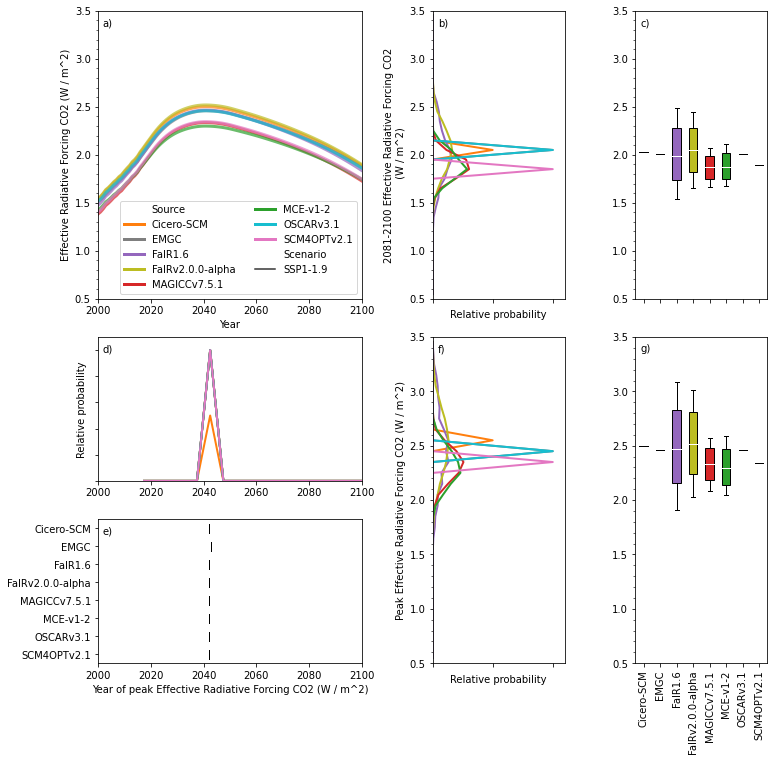

ssp126
ssp126 2081-2100 Effective Radiative Forcing|Anthropogenic|CO2 (W / m^2)
Not using OSCAR reported data for ssp126 2081-2100 Effective Radiative Forcing|Anthropogenic|CO2 (W / m^2)


Renormalising histograms:   0%|          | 0/8 [00:00<?, ?it/s]

ssp126
ssp126 Peak Effective Radiative Forcing|Anthropogenic|CO2 (W / m^2)
Not using OSCAR reported data for ssp126 Peak Effective Radiative Forcing|Anthropogenic|CO2 (W / m^2)


Renormalising histograms:   0%|          | 0/8 [00:00<?, ?it/s]

ssp126
ssp126 Year of peak Effective Radiative Forcing|Anthropogenic|CO2 (W / m^2)
Not using OSCAR reported data for ssp126 Year of peak Effective Radiative Forcing|Anthropogenic|CO2 (W / m^2)


Renormalising histograms:   0%|          | 0/8 [00:00<?, ?it/s]

/data/ubuntu-znicholls/miniconda3/envs/rcmip-phase-2/lib/python3.7/site-packages/ipykernel_launcher.py:103: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


../../paper/ssp126-co2-erf-2100.pdf


/data/ubuntu-znicholls/miniconda3/envs/rcmip-phase-2/lib/python3.7/site-packages/ipykernel_launcher.py:110: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


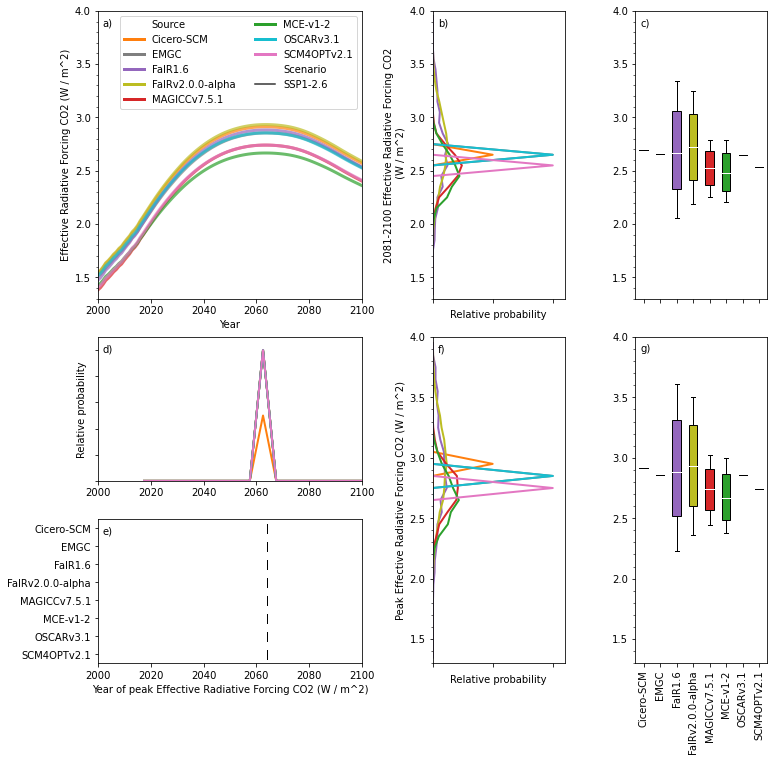

ssp585
ssp585 2081-2100 Effective Radiative Forcing|Anthropogenic|CO2 (W / m^2)
Not using OSCAR reported data for ssp585 2081-2100 Effective Radiative Forcing|Anthropogenic|CO2 (W / m^2)


Renormalising histograms:   0%|          | 0/8 [00:00<?, ?it/s]

/data/ubuntu-znicholls/miniconda3/envs/rcmip-phase-2/lib/python3.7/site-packages/ipykernel_launcher.py:103: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


../../paper/ssp585-co2-erf-2100.pdf


/data/ubuntu-znicholls/miniconda3/envs/rcmip-phase-2/lib/python3.7/site-packages/ipykernel_launcher.py:110: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


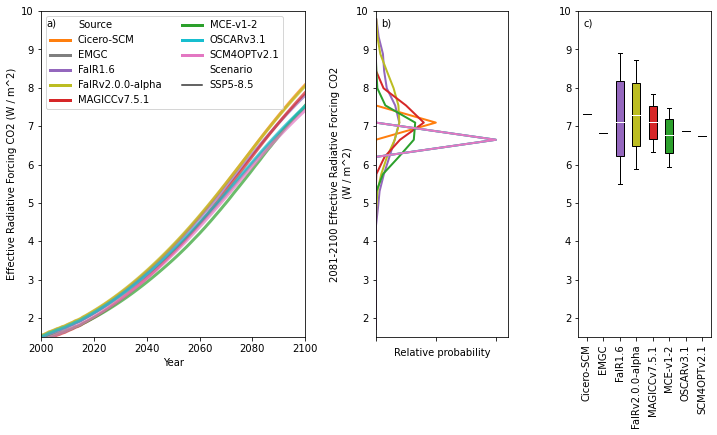

<IPython.core.display.Javascript object>

In [25]:
scenarios_ylims_peaks = (
    (
        "ssp119",
        [0.5, 3.5],
        True,
        False,
        {"Cicero-SCM": 1 / 2},
        0.1,
    ),
    (
        "ssp126",
        [1.3, 4.0],
        True,
        False,
        {"Cicero-SCM": 1 / 2},
        0.1,
    ),
    #     (
    #         "ssp434",
    #         [1.5, 5.5],
    #         True,
    #         False,
    #         {"Cicero-SCM": 1 / 2},
    #         0.1,
    #     ),
    #     (
    #         "ssp534-over",
    #         [1.5, 6.5],
    #         True,
    #         False,
    #         {"Cicero-SCM": 1 / 2},
    #         0.1,
    #     ),
    #     (
    #         "ssp245",
    #         [1.5, 7],
    #         False,
    #         False,
    #         {"Cicero-SCM": 1 / 2},
    #         0.1,
    #     ),
    #     (
    #         "ssp460",
    #         [1.5, 8],
    #         False,
    #         False,
    #         {"Cicero-SCM": 1 / 2},
    #         0.1,
    #     ),
    #     (
    #         "ssp370",
    #         [1.5, 10],
    #         False,
    #         False,
    #         {"Cicero-SCM": 1 / 2},
    #         0.1,
    #     ),
    (
        "ssp585",
        [1.5, 10],
        False,
        False,
        {"Cicero-SCM": 1 / 2},
        0.1,
    ),
)

for (
    scenario,
    ylim_ts,
    include_peak,
    cmip6,
    custom_heights,
    bin_width,
) in tqdman.tqdm(scenarios_ylims_peaks[:], desc="Scenarios"):
    utils.plotting.make_overview_plot(
        erf_timeseries,
        None,
        quantiles,
        process_over_columns,
        scenario,
        ref_period,
        eval_period_end=range(2081, 2100 + 1),
        plt_years=range(2000, 2100 + 1),
        ylim_ts=ylim_ts,
        linewidth=linewidth,
        palette=palette,
        hue=hue,
        units=units,
        variable=variable,
        cmip_var=None,
        unit=unit,
        include_peak=include_peak,
        custom_heights=custom_heights,
        cmip6=False,
        include_assessed_pdf=False,
        bin_width=bin_width,
    )

    for ax in plt.gcf().axes:
        ax = remove_pipes_in_axis_labels(ax)

    plt.tight_layout()
    outfile = os.path.join(
        PAPER_DIR,
        f"{scenario}-co2-erf-2100.pdf",
    )
    plt.savefig(outfile, **utils.plotting.SAVE_KWARGS)
    print(outfile)
    plt.tight_layout()
    plt.show()
#     break

Scenarios:   0%|          | 0/3 [00:00<?, ?it/s]

ssp119
ssp119 2250-2300 Effective Radiative Forcing|Anthropogenic|CO2 (W / m^2)
Not using OSCAR reported data for ssp119 2250-2300 Effective Radiative Forcing|Anthropogenic|CO2 (W / m^2)


Renormalising histograms:   0%|          | 0/8 [00:00<?, ?it/s]

/data/ubuntu-znicholls/miniconda3/envs/rcmip-phase-2/lib/python3.7/site-packages/ipykernel_launcher.py:103: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


../../paper/ssp119-co2-erf-2300.pdf


/data/ubuntu-znicholls/miniconda3/envs/rcmip-phase-2/lib/python3.7/site-packages/ipykernel_launcher.py:110: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


ssp126
ssp126 2250-2300 Effective Radiative Forcing|Anthropogenic|CO2 (W / m^2)
Not using OSCAR reported data for ssp126 2250-2300 Effective Radiative Forcing|Anthropogenic|CO2 (W / m^2)


Renormalising histograms:   0%|          | 0/8 [00:00<?, ?it/s]

/data/ubuntu-znicholls/miniconda3/envs/rcmip-phase-2/lib/python3.7/site-packages/ipykernel_launcher.py:103: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


../../paper/ssp126-co2-erf-2300.pdf


/data/ubuntu-znicholls/miniconda3/envs/rcmip-phase-2/lib/python3.7/site-packages/ipykernel_launcher.py:110: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


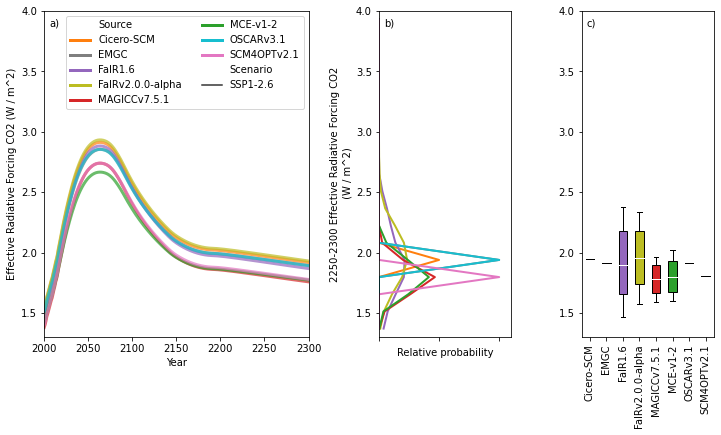

ssp585
ssp585 2250-2300 Effective Radiative Forcing|Anthropogenic|CO2 (W / m^2)
Not using OSCAR reported data for ssp585 2250-2300 Effective Radiative Forcing|Anthropogenic|CO2 (W / m^2)


Renormalising histograms:   0%|          | 0/8 [00:00<?, ?it/s]

/data/ubuntu-znicholls/miniconda3/envs/rcmip-phase-2/lib/python3.7/site-packages/ipykernel_launcher.py:103: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


../../paper/ssp585-co2-erf-2300.pdf


/data/ubuntu-znicholls/miniconda3/envs/rcmip-phase-2/lib/python3.7/site-packages/ipykernel_launcher.py:110: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


<IPython.core.display.Javascript object>

In [25]:
scenarios_ylims_peaks = (
    (
        "ssp119",
        [0.5, 3.5],
        False,
        False,
        {"Cicero-SCM": 1 / 2},
        0.1,
    ),
    (
        "ssp126",
        [1.3, 4.0],
        False,
        False,
        {"Cicero-SCM": 1 / 2},
        0.1,
    ),
    #     (
    #         "ssp434",
    #         [1.5, 5.5],
    #         True,
    #         False,
    #         {"Cicero-SCM": 1 / 2},
    #         0.1,
    #     ),
    #     (
    #         "ssp534-over",
    #         [1.5, 6.5],
    #         True,
    #         False,
    #         {"Cicero-SCM": 1 / 2},
    #         0.1,
    #     ),
    #     (
    #         "ssp245",
    #         [1.5, 7],
    #         False,
    #         False,
    #         {"Cicero-SCM": 1 / 2},
    #         0.1,
    #     ),
    #     (
    #         "ssp460",
    #         [1.5, 8],
    #         False,
    #         False,
    #         {"Cicero-SCM": 1 / 2},
    #         0.1,
    #     ),
    #     (
    #         "ssp370",
    #         [1.5, 10],
    #         False,
    #         False,
    #         {"Cicero-SCM": 1 / 2},
    #         0.1,
    #     ),
    (
        "ssp585",
        [1.5, 16],
        False,
        False,
        {"Cicero-SCM": 1 / 2},
        0.1,
    ),
)

for (
    scenario,
    ylim_ts,
    include_peak,
    cmip6,
    custom_heights,
    bin_width,
) in tqdman.tqdm(scenarios_ylims_peaks[:], desc="Scenarios"):
    utils.plotting.make_overview_plot(
        erf_timeseries,
        None,
        quantiles,
        process_over_columns,
        scenario,
        ref_period,
        eval_period_end=range(2250, 2300 + 1),
        plt_years=range(2000, 2300 + 1),
        ylim_ts=ylim_ts,
        linewidth=linewidth,
        palette=palette,
        hue=hue,
        units=units,
        variable=variable,
        cmip_var=None,
        unit=unit,
        include_peak=include_peak,
        custom_heights=custom_heights,
        cmip6=False,
        include_assessed_pdf=False,
        bin_width=bin_width,
    )

    for ax in plt.gcf().axes:
        ax = remove_pipes_in_axis_labels(ax)

    plt.tight_layout()
    outfile = os.path.join(
        PAPER_DIR,
        f"{scenario}-co2-erf-2300.pdf",
    )
    plt.savefig(outfile, **utils.plotting.SAVE_KWARGS)
    print(outfile)
    plt.tight_layout()
    plt.show()
#     break

In [26]:
variable = "Effective Radiative Forcing|Anthropogenic|Tropospheric Ozone"

<IPython.core.display.Javascript object>

In [27]:
scenarios_ylims_peaks = (
    (
        "ssp119",
        [-0.1, 0.6],
        False,
        False,
        {"Cicero-SCM": 1 / 2},
        0.1,
    ),
    #     (
    #         "ssp126",
    #         [1.3, 4.0],
    #         True,
    #         False,
    #         {"Cicero-SCM": 1 / 2},
    #         0.1,
    #     ),
    #     #     (
    #     #         "ssp434",
    #     #         [1.5, 5.5],
    #     #         True,
    #     #         False,
    #     #         {"Cicero-SCM": 1 / 2},
    #     #         0.1,
    #     #     ),
    #     #     (
    #     #         "ssp534-over",
    #     #         [1.5, 6.5],
    #     #         True,
    #     #         False,
    #     #         {"Cicero-SCM": 1 / 2},
    #     #         0.1,
    #     #     ),
    #     #     (
    #     #         "ssp245",
    #     #         [1.5, 7],
    #     #         False,
    #     #         False,
    #     #         {"Cicero-SCM": 1 / 2},
    #     #         0.1,
    #     #     ),
    #     #     (
    #     #         "ssp460",
    #     #         [1.5, 8],
    #     #         False,
    #     #         False,
    #     #         {"Cicero-SCM": 1 / 2},
    #     #         0.1,
    #     #     ),
    #     #     (
    #     #         "ssp370",
    #     #         [1.5, 10],
    #     #         False,
    #     #         False,
    #     #         {"Cicero-SCM": 1 / 2},
    #     #         0.1,
    #     #     ),
    #     (
    #         "ssp585",
    #         [1.5, 10],
    #         False,
    #         False,
    #         {"Cicero-SCM": 1 / 2},
    #         0.1,
    #     ),
)

for (
    scenario,
    ylim_ts,
    include_peak,
    cmip6,
    custom_heights,
    bin_width,
) in tqdman.tqdm(scenarios_ylims_peaks[:], desc="Scenarios"):
    utils.plotting.make_overview_plot(
        erf_timeseries,
        None,
        quantiles,
        process_over_columns,
        scenario,
        ref_period,
        eval_period_end=range(2081, 2100 + 1),
        plt_years=range(2000, 2100 + 1),
        ylim_ts=ylim_ts,
        linewidth=linewidth,
        palette=palette,
        hue=hue,
        units=units,
        variable=variable,
        cmip_var=None,
        unit=unit,
        include_peak=include_peak,
        custom_heights=custom_heights,
        cmip6=False,
        include_assessed_pdf=False,
        bin_width=bin_width,
    )

    for ax in plt.gcf().axes:
        ax = remove_pipes_in_axis_labels(ax)

    plt.tight_layout()
    outfile = os.path.join(
        PAPER_DIR,
        f"{scenario}-tropospheric-ozone-erf-2100.pdf",
    )
    plt.savefig(outfile, **utils.plotting.SAVE_KWARGS)
    print(outfile)
    plt.tight_layout()
    plt.show()

Scenarios:   0%|          | 0/1 [00:00<?, ?it/s]

ssp119
ssp119 2081-2100 Effective Radiative Forcing|Anthropogenic|Tropospheric Ozone (W / m^2)
Not using OSCAR reported data for ssp119 2081-2100 Effective Radiative Forcing|Anthropogenic|Tropospheric Ozone (W / m^2)


Renormalising histograms:   0%|          | 0/4 [00:00<?, ?it/s]

/data/ubuntu-znicholls/miniconda3/envs/rcmip-phase-2/lib/python3.7/site-packages/ipykernel_launcher.py:103: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


../../paper/ssp119-tropospheric-ozone-erf-2100.pdf


/data/ubuntu-znicholls/miniconda3/envs/rcmip-phase-2/lib/python3.7/site-packages/ipykernel_launcher.py:110: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


<IPython.core.display.Javascript object>

In [28]:
# helper = scmdata.run_append(
#     [
#         db.load_data(
#             climate_model=cm,
#             scenario="ssp119",
#             region="World",
#             variable="Effective Radiative Forcing*",
#         )
#         for cm in ["MAGICC*", "OSCAR*", "FaIR*"]
#     ]
# )
# helper.head()

<IPython.core.display.Javascript object>

In [29]:
# tmp = scmdata.ScmRun(helper.process_over("ensemble_member", "median"))
# for v in tmp.groupby("variable"):
#     p = v.filter(year=range(1750, 2101))
#     ax = p.lineplot(hue="climate_model", palette=palette)
#     ax.set_title(v.get_unique_meta("variable", no_duplicates=True))
#     plt.show()

#     try:
#         p.filter(climate_model="FaIR1*").subtract(
#             p.filter(climate_model="MAGICC*"),
#             op_cols={"climate_model": "FaIR1.6 - MAGICC7"},
#         ).lineplot()
#         plt.show()
#     except ValueError:
#         pass

<IPython.core.display.Javascript object>

In [30]:
variable = "Effective Radiative Forcing|Anthropogenic|Aerosols"

<IPython.core.display.Javascript object>

Scenarios:   0%|          | 0/3 [00:00<?, ?it/s]

ssp119
ssp119 2081-2100 Effective Radiative Forcing|Anthropogenic|Aerosols (W / m^2)
Using OSCAR reported data for ssp119 2081-2100 Effective Radiative Forcing|Anthropogenic|Aerosols (W / m^2)


Renormalising histograms:   0%|          | 0/9 [00:00<?, ?it/s]

/data/ubuntu-znicholls/miniconda3/envs/rcmip-phase-2/lib/python3.7/site-packages/ipykernel_launcher.py:96: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


../../paper/ssp119-aerosol-erf-2100.pdf


/data/ubuntu-znicholls/miniconda3/envs/rcmip-phase-2/lib/python3.7/site-packages/ipykernel_launcher.py:103: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


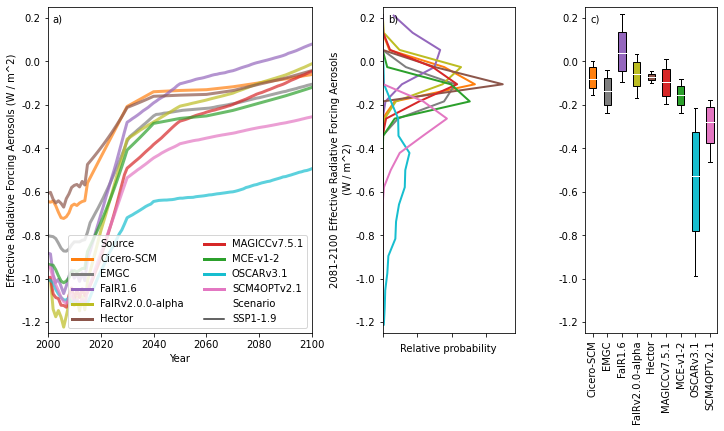

ssp126
ssp126 2081-2100 Effective Radiative Forcing|Anthropogenic|Aerosols (W / m^2)
Using OSCAR reported data for ssp126 2081-2100 Effective Radiative Forcing|Anthropogenic|Aerosols (W / m^2)


Renormalising histograms:   0%|          | 0/9 [00:00<?, ?it/s]

/data/ubuntu-znicholls/miniconda3/envs/rcmip-phase-2/lib/python3.7/site-packages/ipykernel_launcher.py:96: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


../../paper/ssp126-aerosol-erf-2100.pdf


/data/ubuntu-znicholls/miniconda3/envs/rcmip-phase-2/lib/python3.7/site-packages/ipykernel_launcher.py:103: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


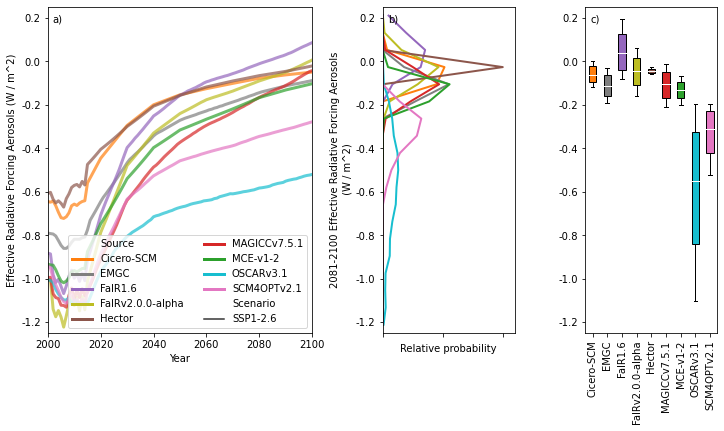

ssp585
ssp585 2081-2100 Effective Radiative Forcing|Anthropogenic|Aerosols (W / m^2)
Using OSCAR reported data for ssp585 2081-2100 Effective Radiative Forcing|Anthropogenic|Aerosols (W / m^2)


Renormalising histograms:   0%|          | 0/9 [00:00<?, ?it/s]

/data/ubuntu-znicholls/miniconda3/envs/rcmip-phase-2/lib/python3.7/site-packages/ipykernel_launcher.py:96: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


../../paper/ssp585-aerosol-erf-2100.pdf


/data/ubuntu-znicholls/miniconda3/envs/rcmip-phase-2/lib/python3.7/site-packages/ipykernel_launcher.py:103: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


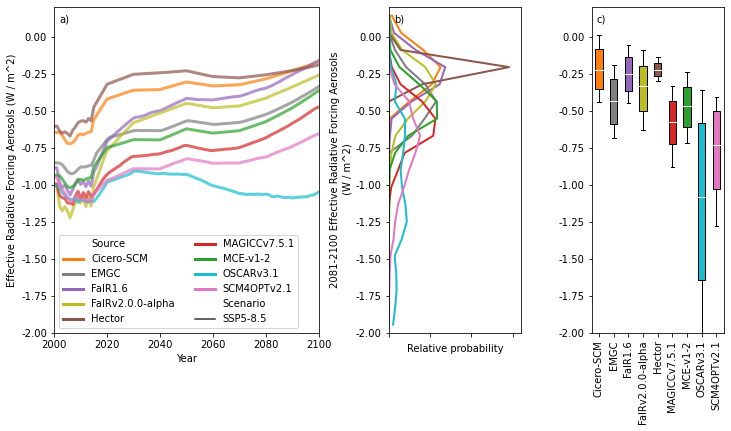

<IPython.core.display.Javascript object>

In [31]:
scenarios_ylims_peaks = (
    (
        "ssp119",
        [-1.25, 0.25],
        False,
        {},
        0.1,
    ),
    (
        "ssp126",
        [-1.25, 0.25],
        False,
        {},
        0.1,
    ),
    #     (
    #         "ssp434",
    #         [-1.75, 0],
    #         False,
    #         {},
    #         0.1,
    #     ),
    #     (
    #         "ssp534-over",
    #         [-1.5, 0.25],
    #         False,
    #         {},
    #         0.1,
    #     ),
    #     (
    #         "ssp245",
    #         [-1.5, 0],
    #         False,
    #         {},
    #         0.1,
    #     ),
    #     (
    #         "ssp460",
    #         [-2, 0],
    #         False,
    #         {},
    #         0.1,
    #     ),
    #     (
    #         "ssp370",
    #         [-2.5, 0],
    #         False,
    #         {},
    #         0.1,
    #     ),
    (
        "ssp585",
        [-2, 0.2],
        False,
        {},
        0.1,
    ),
)

for (
    scenario,
    ylim_ts,
    cmip6,
    custom_heights,
    bin_width,
) in tqdman.tqdm(scenarios_ylims_peaks[:], desc="Scenarios"):
    utils.plotting.make_overview_plot(
        erf_timeseries,
        None,
        quantiles,
        process_over_columns,
        scenario,
        ref_period,
        eval_period_end=range(2081, 2100 + 1),
        plt_years=range(2000, 2100 + 1),
        #         eval_period_end=range(2200, 2300 + 1),
        #         plt_years=range(2000, 2300 + 1),
        ylim_ts=ylim_ts,
        linewidth=linewidth,
        palette=palette,
        hue=hue,
        units=units,
        variable=variable,
        cmip_var=None,
        unit=unit,
        include_peak=False,
        custom_heights=custom_heights,
        cmip6=False,
        include_assessed_pdf=False,
        bin_width=bin_width,
    )

    for ax in plt.gcf().axes:
        ax = remove_pipes_in_axis_labels(ax)

    plt.tight_layout()
    outfile = os.path.join(
        PAPER_DIR,
        f"{scenario}-aerosol-erf-2100.pdf",
    )
    plt.savefig(outfile, **utils.plotting.SAVE_KWARGS)
    print(outfile)
    plt.tight_layout()
    plt.show()

Scenarios:   0%|          | 0/3 [00:00<?, ?it/s]

ssp119
ssp119 2250-2300 Effective Radiative Forcing|Anthropogenic|Aerosols (W / m^2)
Using OSCAR reported data for ssp119 2250-2300 Effective Radiative Forcing|Anthropogenic|Aerosols (W / m^2)


Renormalising histograms:   0%|          | 0/8 [00:00<?, ?it/s]

/data/ubuntu-znicholls/miniconda3/envs/rcmip-phase-2/lib/python3.7/site-packages/ipykernel_launcher.py:96: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


../../paper/ssp119-aerosol-erf-2300.pdf


/data/ubuntu-znicholls/miniconda3/envs/rcmip-phase-2/lib/python3.7/site-packages/ipykernel_launcher.py:103: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


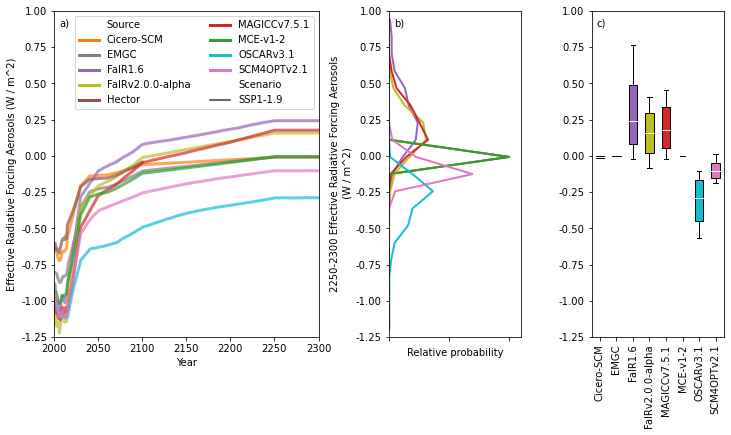

ssp126
ssp126 2250-2300 Effective Radiative Forcing|Anthropogenic|Aerosols (W / m^2)
Using OSCAR reported data for ssp126 2250-2300 Effective Radiative Forcing|Anthropogenic|Aerosols (W / m^2)


Renormalising histograms:   0%|          | 0/8 [00:00<?, ?it/s]

/data/ubuntu-znicholls/miniconda3/envs/rcmip-phase-2/lib/python3.7/site-packages/ipykernel_launcher.py:96: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


../../paper/ssp126-aerosol-erf-2300.pdf


/data/ubuntu-znicholls/miniconda3/envs/rcmip-phase-2/lib/python3.7/site-packages/ipykernel_launcher.py:103: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


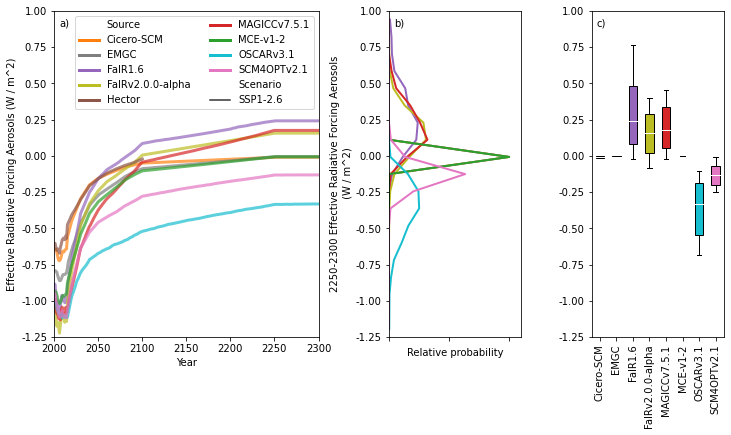

ssp585
ssp585 2250-2300 Effective Radiative Forcing|Anthropogenic|Aerosols (W / m^2)
Using OSCAR reported data for ssp585 2250-2300 Effective Radiative Forcing|Anthropogenic|Aerosols (W / m^2)


Renormalising histograms:   0%|          | 0/8 [00:00<?, ?it/s]

/data/ubuntu-znicholls/miniconda3/envs/rcmip-phase-2/lib/python3.7/site-packages/ipykernel_launcher.py:96: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


../../paper/ssp585-aerosol-erf-2300.pdf


/data/ubuntu-znicholls/miniconda3/envs/rcmip-phase-2/lib/python3.7/site-packages/ipykernel_launcher.py:103: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


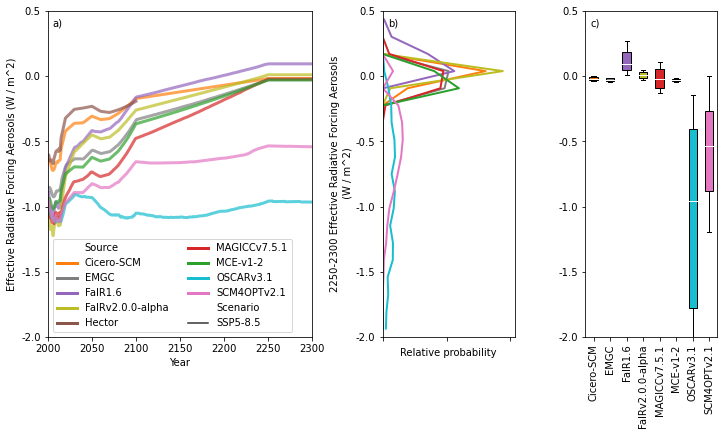

<IPython.core.display.Javascript object>

In [34]:
scenarios_ylims_peaks = (
    (
        "ssp119",
        [-1.25, 1.0],
        False,
        {},
        0.1,
    ),
    (
        "ssp126",
        [-1.25, 1.0],
        False,
        {},
        0.1,
    ),
    #     (
    #         "ssp434",
    #         [-1.75, 0],
    #         False,
    #         {},
    #         0.1,
    #     ),
    #     (
    #         "ssp534-over",
    #         [-1.5, 0.25],
    #         False,
    #         {},
    #         0.1,
    #     ),
    #     (
    #         "ssp245",
    #         [-1.5, 0],
    #         False,
    #         {},
    #         0.1,
    #     ),
    #     (
    #         "ssp460",
    #         [-2, 0],
    #         False,
    #         {},
    #         0.1,
    #     ),
    #     (
    #         "ssp370",
    #         [-2.5, 0],
    #         False,
    #         {},
    #         0.1,
    #     ),
    (
        "ssp585",
        [-2, 0.5],
        False,
        {},
        0.1,
    ),
)

for (
    scenario,
    ylim_ts,
    cmip6,
    custom_heights,
    bin_width,
) in tqdman.tqdm(scenarios_ylims_peaks[:], desc="Scenarios"):
    utils.plotting.make_overview_plot(
        erf_timeseries,
        None,
        quantiles,
        process_over_columns,
        scenario,
        ref_period,
        eval_period_end=range(2250, 2300 + 1),
        plt_years=range(2000, 2300 + 1),
        #         eval_period_end=range(2200, 2300 + 1),
        #         plt_years=range(2000, 2300 + 1),
        ylim_ts=ylim_ts,
        linewidth=linewidth,
        palette=palette,
        hue=hue,
        units=units,
        variable=variable,
        cmip_var=None,
        unit=unit,
        include_peak=False,
        custom_heights=custom_heights,
        cmip6=False,
        include_assessed_pdf=False,
        bin_width=bin_width,
    )

    for ax in plt.gcf().axes:
        ax = remove_pipes_in_axis_labels(ax)

    plt.tight_layout()
    outfile = os.path.join(
        PAPER_DIR,
        f"{scenario}-aerosol-erf-2300.pdf",
    )
    plt.savefig(outfile, **utils.plotting.SAVE_KWARGS)
    print(outfile)
    plt.tight_layout()
    plt.show()